##### Automobile Data Exploration I

<b>DESCRIPTION</b>

Mtcars, an automobile company in Chambersburg, United States, has recorded the production of its cars within a dataset. The company is coming up with a new model based on the feedback given by its customers. It has to explore the current dataset to derive further insights from it.
 

<b>Objective</b>: Import the dataset, explore for dimensionality, and type and average value of the horsepower across all the cars. Also, identify a few of mostly correlated features, which would help
in modification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_mtcars = pd.read_csv("mtcars.csv")

In [3]:
df_mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df_mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
df_mtcars.shape

(32, 12)

In [6]:
df_mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
df_mtcars['model'].value_counts()

Mazda RX4              1
Volvo 142E             1
Dodge Challenger       1
Porsche 914-2          1
Lotus Europa           1
Merc 230               1
Duster 360             1
Mazda RX4 Wag          1
AMC Javelin            1
Lincoln Continental    1
Valiant                1
Merc 280               1
Toyota Corona          1
Merc 280C              1
Merc 450SLC            1
Camaro Z28             1
Merc 450SL             1
Cadillac Fleetwood     1
Ford Pantera L         1
Hornet 4 Drive         1
Ferrari Dino           1
Pontiac Firebird       1
Maserati Bora          1
Fiat 128               1
Chrysler Imperial      1
Honda Civic            1
Fiat X1-9              1
Datsun 710             1
Merc 240D              1
Toyota Corolla         1
Hornet Sportabout      1
Merc 450SE             1
Name: model, dtype: int64

In [8]:
df_mtcars['hp'].value_counts()

175    3
180    3
110    3
123    2
66     2
150    2
245    2
97     1
65     1
230    1
91     1
264    1
105    1
95     1
205    1
62     1
52     1
113    1
109    1
215    1
93     1
335    1
Name: hp, dtype: int64

In [10]:
pd.crosstab(df_mtcars['gear'],df_mtcars['carb'])

carb,1,2,3,4,6,8
gear,,,,,,
3,3,4,3,5,0,0
4,4,4,0,4,0,0
5,0,2,0,1,1,1


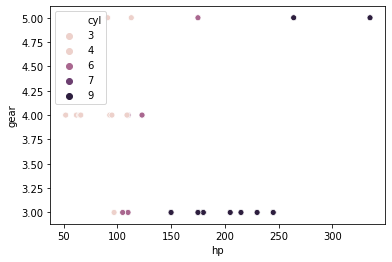

In [13]:
sns.scatterplot(x='hp',
                y='gear',
                hue='cyl',
                data=df_mtcars.iloc[:1000,:])

In [17]:
cat_cols = ['cyl','vs','am','gear']
con_cols=['mpg','disp','wt','drat','qsec']
target = 'hp'

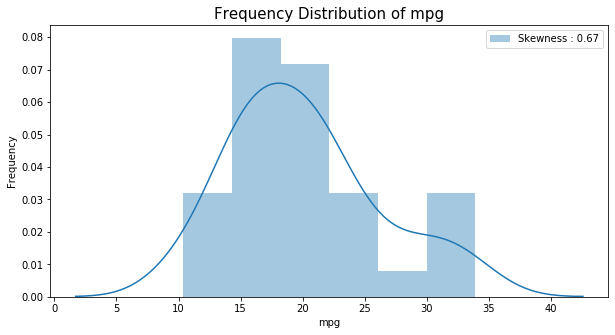

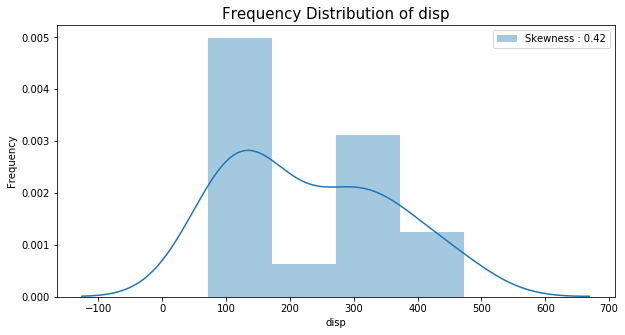

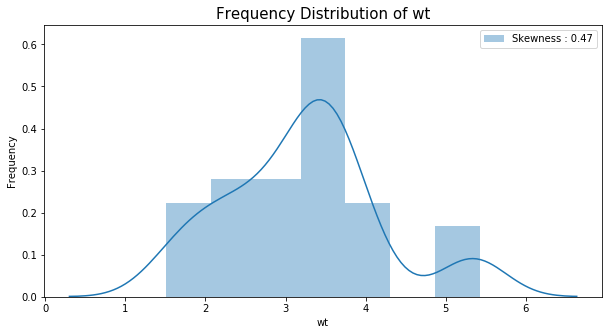

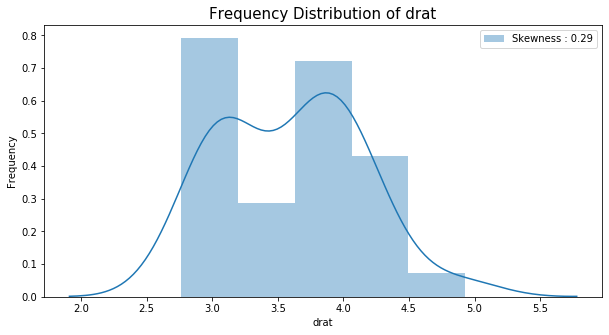

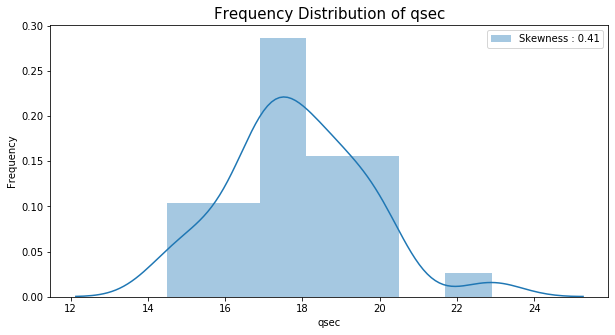

In [19]:
for col in con_cols:
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    ax = sns.distplot(df_mtcars[col], label="Skewness : %.2f"%(df_mtcars[col].skew()))
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.legend(loc='best')
    ax.set_title('Frequency Distribution of {}'.format(col), fontsize = 15)

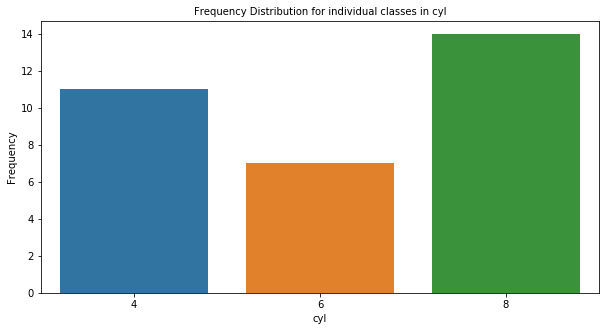

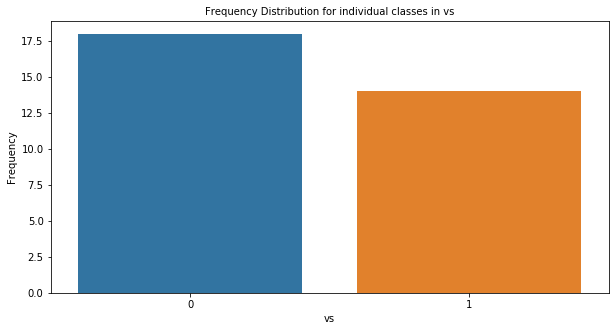

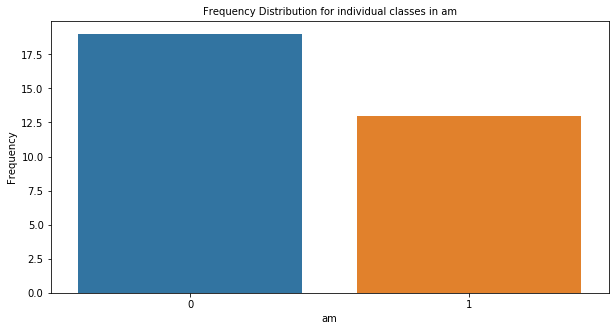

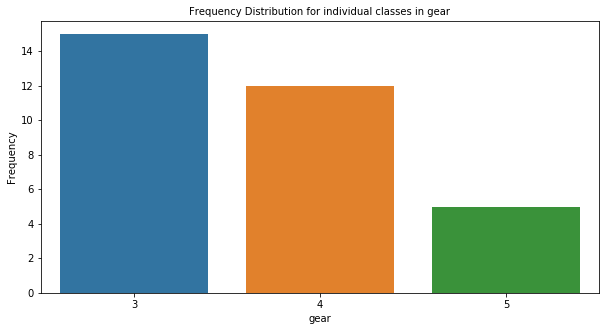

In [20]:
for cat_col in cat_cols:
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    sns.countplot(x = cat_col,
                  data = df_mtcars,
                  ax = ax)
    ax.set_xlabel(cat_col)
    ax.set_ylabel("Frequency")
    ax.set_title('Frequency Distribution for individual classes in {}'.format(cat_col), fontsize = 10)

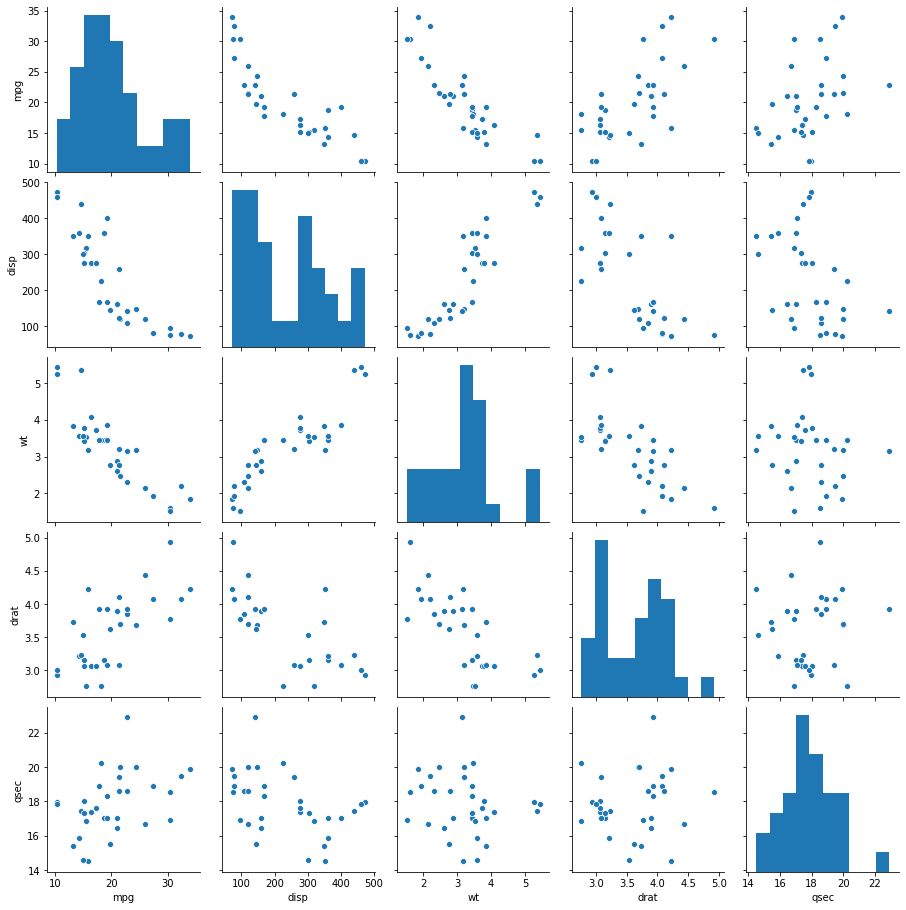

In [21]:
sns.pairplot(df_mtcars[con_cols])

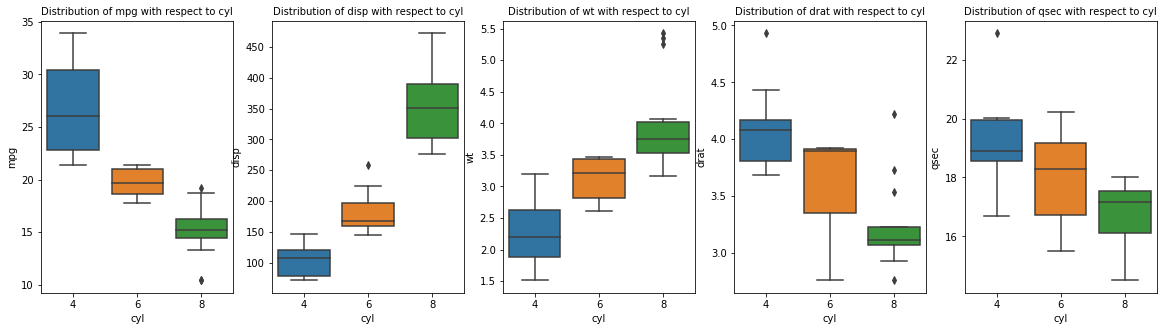

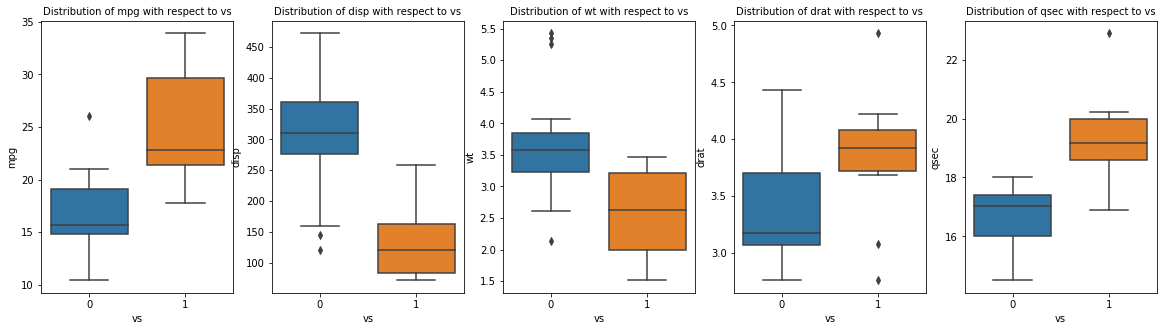

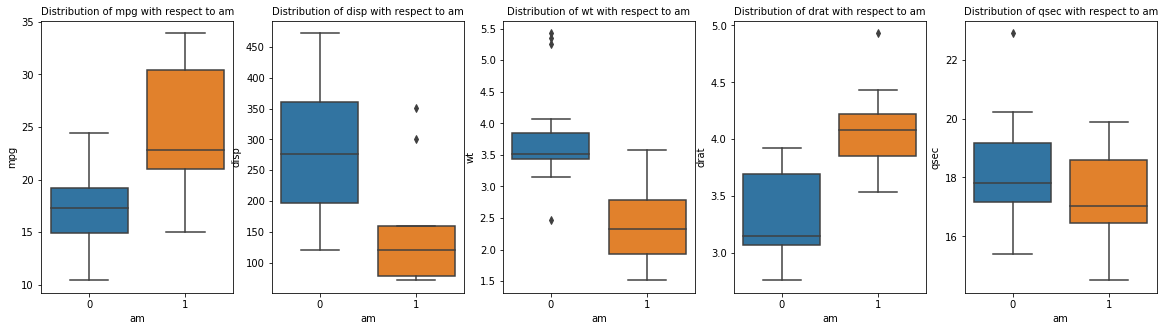

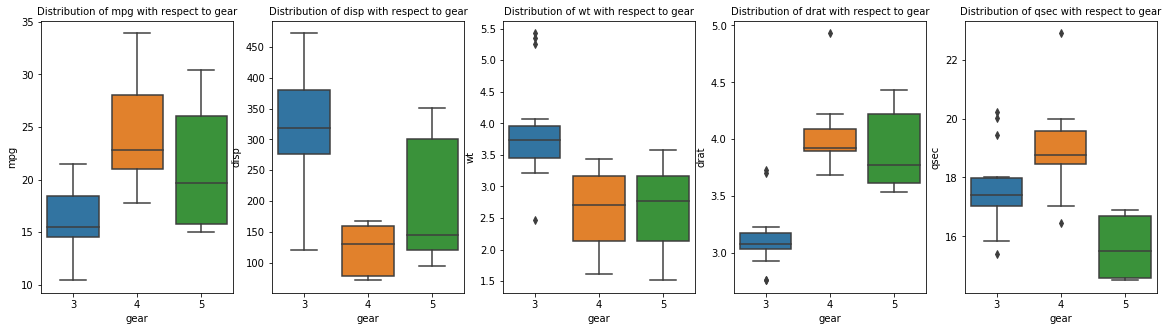

In [23]:
for cat_col in cat_cols:
    fig = plt.figure(figsize = (20,5))
    j = 1
    for con_col in con_cols:
        ax = fig.add_subplot(1,len(con_cols),j)
        sns.boxplot(y = con_col,
                    x = cat_col, 
                    data = df_mtcars, 
                    ax = ax)
        ax.set_xlabel(cat_col)
        ax.set_ylabel(con_col)
        ax.set_title('Distribution of {} with respect to {}'.format(con_col,cat_col), fontsize = 10)
        j = j + 1